In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

## Problem 1
Write a function which implements Euler's method. Test your function on the IVP:
$$\begin{align}
	\begin{split}
		x' (t)&= x(t) - 2t + 4,\quad 0 \leq t \leq 2, \\
		x(0) &= 0,
	\end{split}
\end{align}$$

where the analytic solution is $x(t) = -2+2t + 2e^t$.

Use the Euler method to numerically approximate the solution with step sizes $h = 0.2, 0.1$, and $0.05.$  Plot the true solution alongside the three approximations.

In [3]:
def euler(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the Euler method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    #initialize the x-array
    m, = np.shape(x0)
    x_array = np.zeros((len(t), m)) 
    x_array[0,:] = x0
    h = np.max(t)/(len(t)-1)
    #now start the loop
    for i in range(1, len(t)):
        x_array[i,:] = x_array[i-1,:] + h*f(x_array[i-1,:],t[i-1])
    #return the final value
    return x_array

<IPython.core.display.Javascript object>


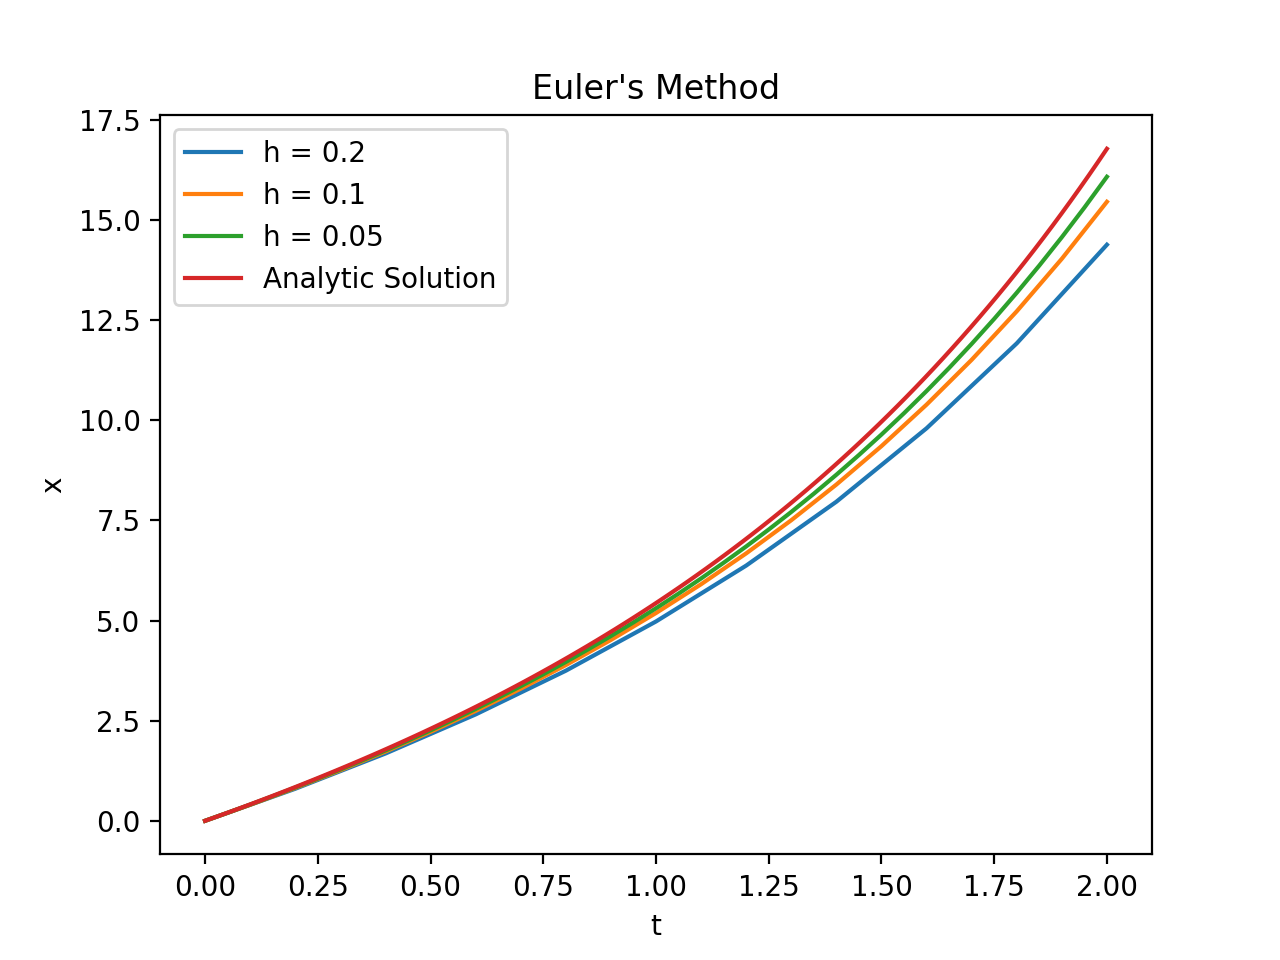

In [4]:
#initialize the values
h_list = [0.2,0.1,0.05]
x0 = np.array([0])
array_list = list()
#get the x_arrays to plot
def f(x,t):
    return x-(2*t)+4
def sol(t):
    return -2 + 2*t + 2*np.exp(t)    
t_list = list()
#plot the results
fig = plt.figure(1)
ax = fig.add_subplot(111)
for i in h_list:
    t = np.linspace(0,2,int(2/(i))+1)
    ans = euler(f,x0,t)
    plt.plot(t,ans.flatten(),label='h = {}'.format(i))
    
plt.plot(np.linspace(0,2,100),sol(np.linspace(0,2,100)),label='Analytic Solution')
plt.legend(loc="upper left")
plt.title("Euler's Method")
ax.set_xlabel("t")
ax.set_ylabel("x")
plt.show()

## Problem 2

Write functions that implement the midpoint and fourth-order Runge-Kutta methods. Then, consider again the IVP from Problem 1. Use the Euler, Midpoint, and RK4 methods to approximate the value of the solution for step sizes of $h = 0.2,$ $ 0.1,$ $0.05 $, $0.025,$ and $0.0125.$ Plot the true solution alongside the approximation obtained from each method when $h=0.2$. Then, use `plt.loglog` to create a log-log plot of the relative error $|x(2)-x_n|/{|x(2)|}$ as a function of $h$ for each approximation.

In [5]:
def midpoint(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the midpoint method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    #initialize the x-array
    m, = np.shape(x0)
    x = np.zeros((len(t), m)) 
    x[0,:] = x0
    #now start the loop
    h = np.max(t)/(len(t)-1)
    #now do the rest of the midpoint stuff
    for i in range(1, len(t)):
        K_1 = x[i-1,:] + (h/2)*f(x[i-1,:],t[i-1])
        x[i,:] = x[i-1,:] + h*f(K_1,t[i-1]+h/2)
    return x

def rk4(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    #initialize the x-array
    m, = np.shape(x0)
    x = np.zeros((len(t), m)) 
    x[0,:] = x0
    #now start the loop
    h = np.max(t)/(len(t)-1)
    for i in range(1, len(t)):
        K_1 = f(x[i-1,:],t[i-1])
        K_2 = f(x[i-1,:]+(h/2*K_1),t[i-1]+h/2)
        K_3 = f(x[i-1,:]+(h/2*K_2),t[i-1]+h/2)
        K_4 = f(x[i-1,:]+h*K_3,t[i-1]+h)
        x[i,:] = x[i-1,:]+h/6*(K_1+2*K_2+2*K_3+K_4)
    #return the right value
    return x
        

<IPython.core.display.Javascript object>


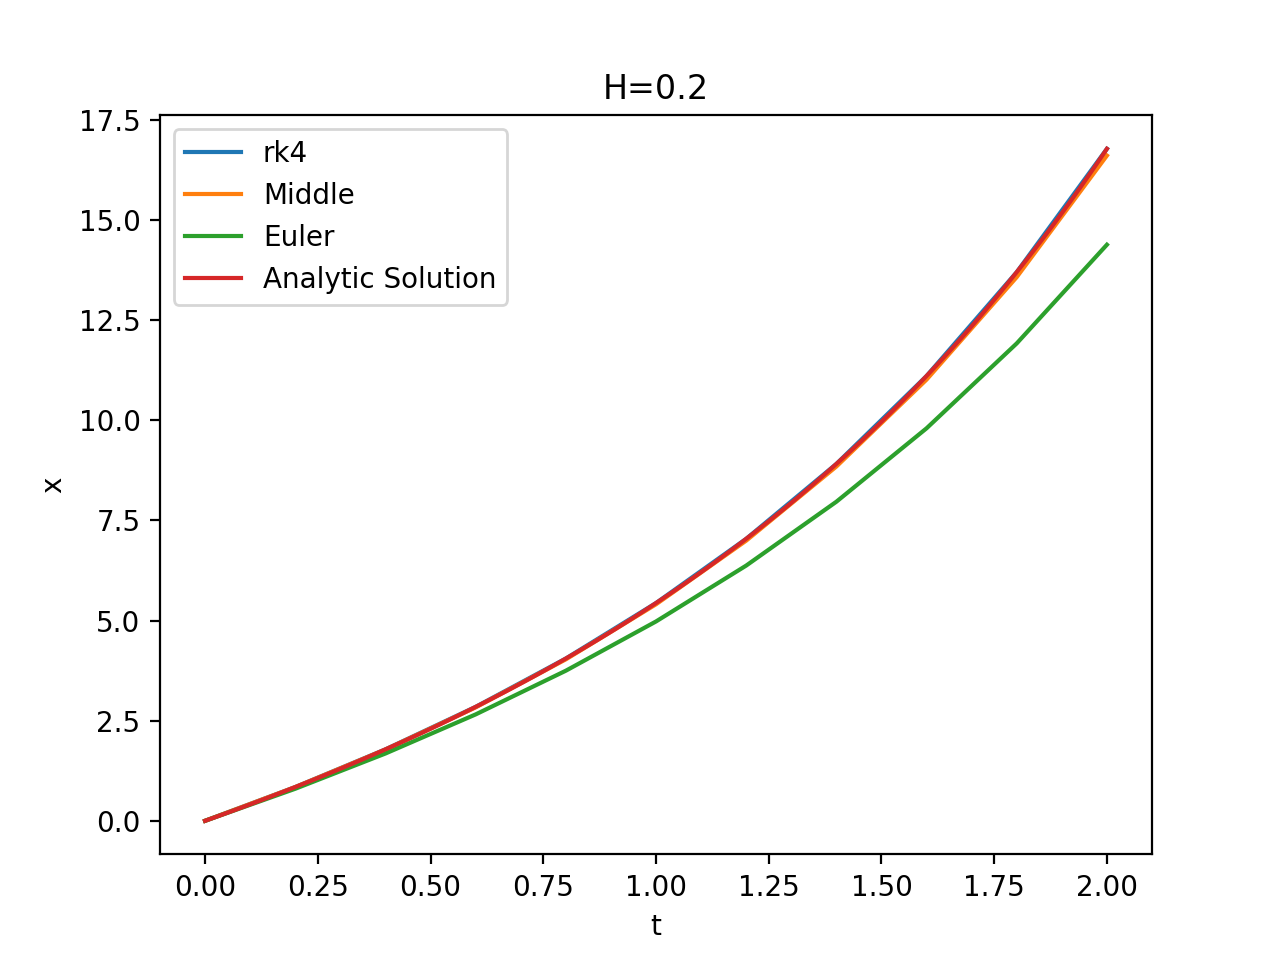

In [6]:
h_list=[0.2,0.1,0.05,0.025,0.0125]
x0=np.array([0])
array_list = list()
#get the x_arrays to plot
def f(x,t):
    return x - 2*t + 4
#define the actual solution
def sol(t):
    return -2 + 2*t + 2*np.exp(t)   
#now compute the errors in the h_list
fig = plt.figure(2)
ax = fig.add_subplot(111)
eul_error = list()
mid_error = list()
rk4_error = list()
for it, i in enumerate(h_list):
    t = np.linspace(0,2,int(2/(i))+1)
    eul = euler(f,x0,t)
    middle = midpoint(f,x0,t)
    four = rk4(f,x0,t)
    #save the h=0.2 results
    if (it == 0):
        plt.plot(t,four,label="rk4")
        plt.plot(t,middle,label="Middle")
        plt.plot(t,eul,label="Euler")
        plt.plot(np.linspace(0,2,100),sol(np.linspace(0,2,100)),label='Analytic Solution')
    #calculate the relative errors
    eul_error.append(np.abs(sol(t[-1]) - eul[-1,:])/np.abs(sol(t[-1])))
    mid_error.append(np.abs(sol(t[-1]) - middle[-1,:])/np.abs(sol(t[-1])))
    rk4_error.append(np.abs(sol(t[-1]) - four[-1,:])/np.abs(sol(t[-1])))
    
plt.legend(loc="upper left")
plt.title("H=0.2")
ax.set_xlabel("t")
ax.set_ylabel("x")
plt.show()

<IPython.core.display.Javascript object>


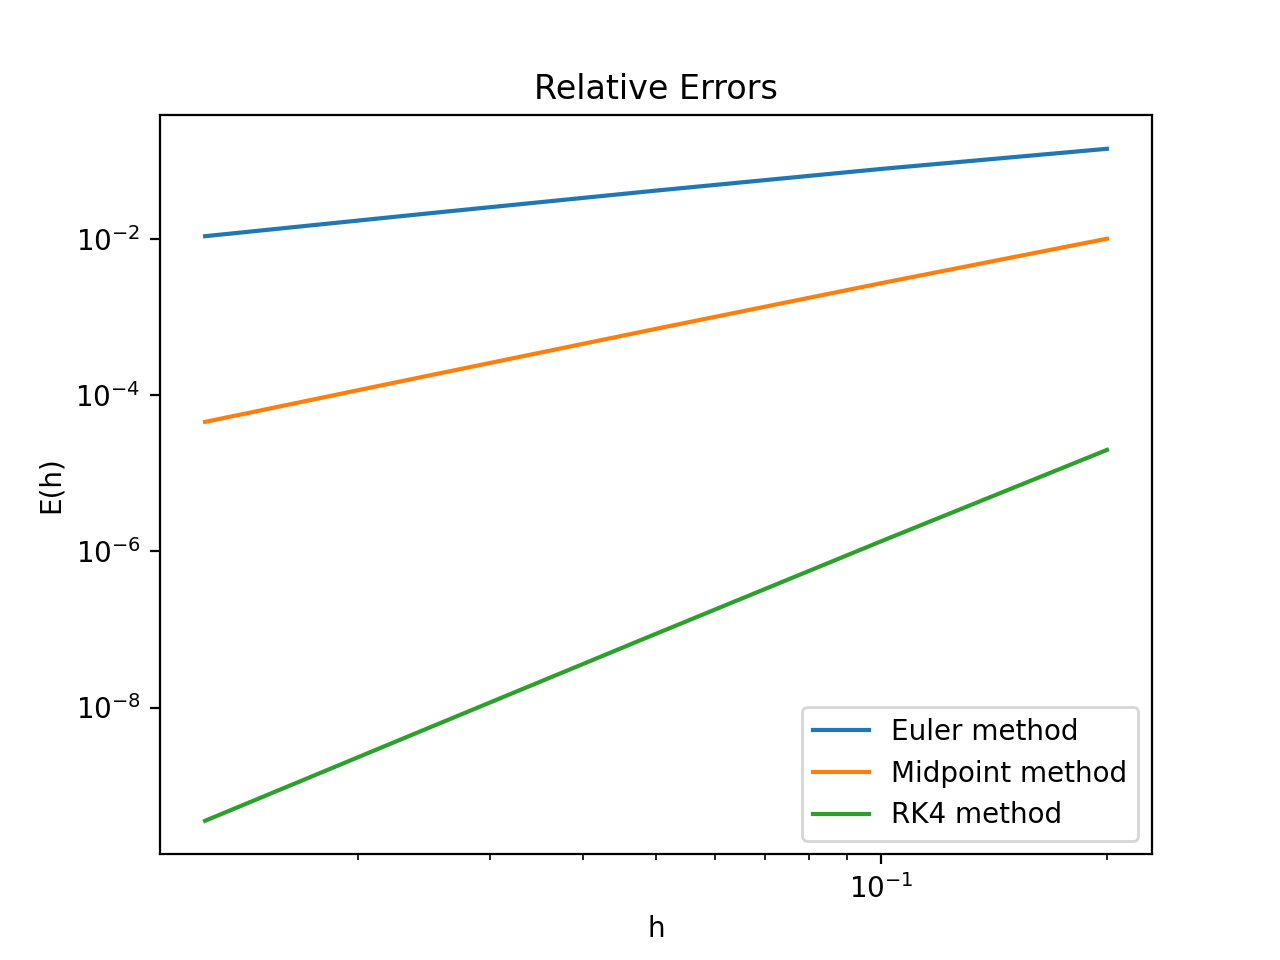

In [7]:
#plot the error results
fig = plt.figure(3)
ax = fig.add_subplot(111)
plt.loglog(h_list,eul_error,label="Euler method")
plt.loglog(h_list,mid_error,label="Midpoint method")
plt.loglog(h_list,rk4_error,label="RK4 method")
plt.legend(loc="lower right")
plt.title("Relative Errors")
ax.set_xlabel("h")
ax.set_ylabel("E(h)")
plt.show()

## Problem 3

Use the RK4 method to solve for the simple harmonic oscillator satisfying:
$$\begin{align}
	\begin{split}
&{}my'' + ky = 0,\quad 0 \leq t \leq 20, \\
&{}y(0) = 2, \quad
y'(0) = -1,
	\end{split}
\end{align}$$

<IPython.core.display.Javascript object>


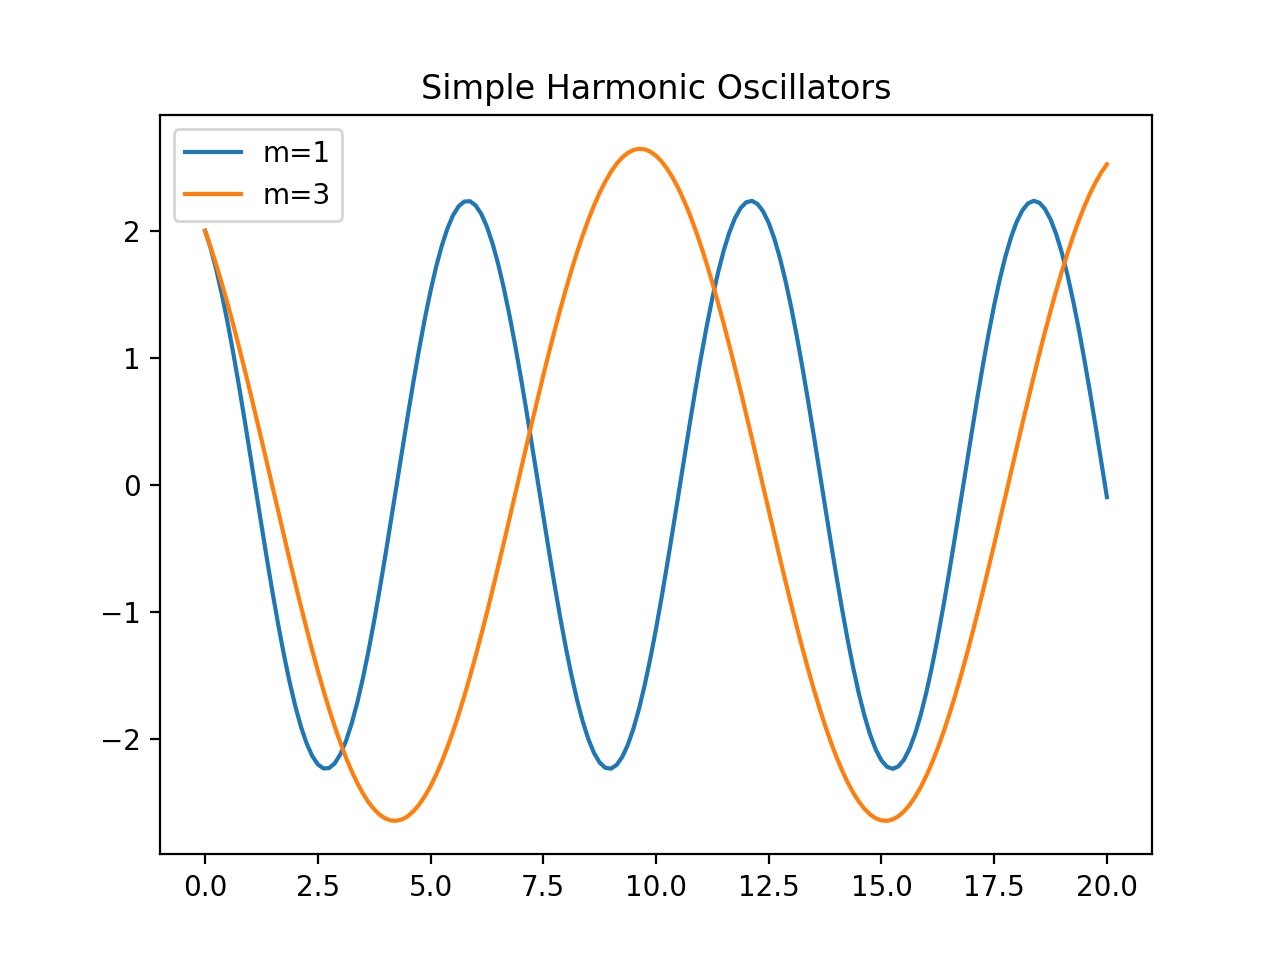

In [8]:
#define the function
def f_gen(m=1,k=1):
    def f(x,t):
        return np.array([x[1], -k/m*x[0]])
    return f
#initial values
x0 = np.array([2,-1])
h = 0.0125
t = np.linspace(0,20,int(np.ceil(2/(h)))+1)
x = rk4(f_gen(),x0,t)
x_1 = rk4(f_gen(m=3),x0,t)
#plot the results
fig = plt.figure(4)
ax = fig.add_subplot(111)
plt.plot(t,x[:,0],label="m=1")
plt.plot(t,x_1[:,0],label="m=3")
ax.legend(loc="upper left")
ax.set_title("Simple Harmonic Oscillators")
plt.show()

## Problem 4

Use the RK4 method to solve for the damped free harmonic oscillator satisfying 
$$\begin{align*}
&{}y'' +\gamma y'+ y = 0, \quad 0 \leq t \leq 20,\\
&{}y(0) = 1, \quad
y'(0) = -1.
\end{align*}$$
For $\gamma = 1/2,$ and $\gamma = 1$, simultaneously plot your numerical approximations of $y$.

<IPython.core.display.Javascript object>


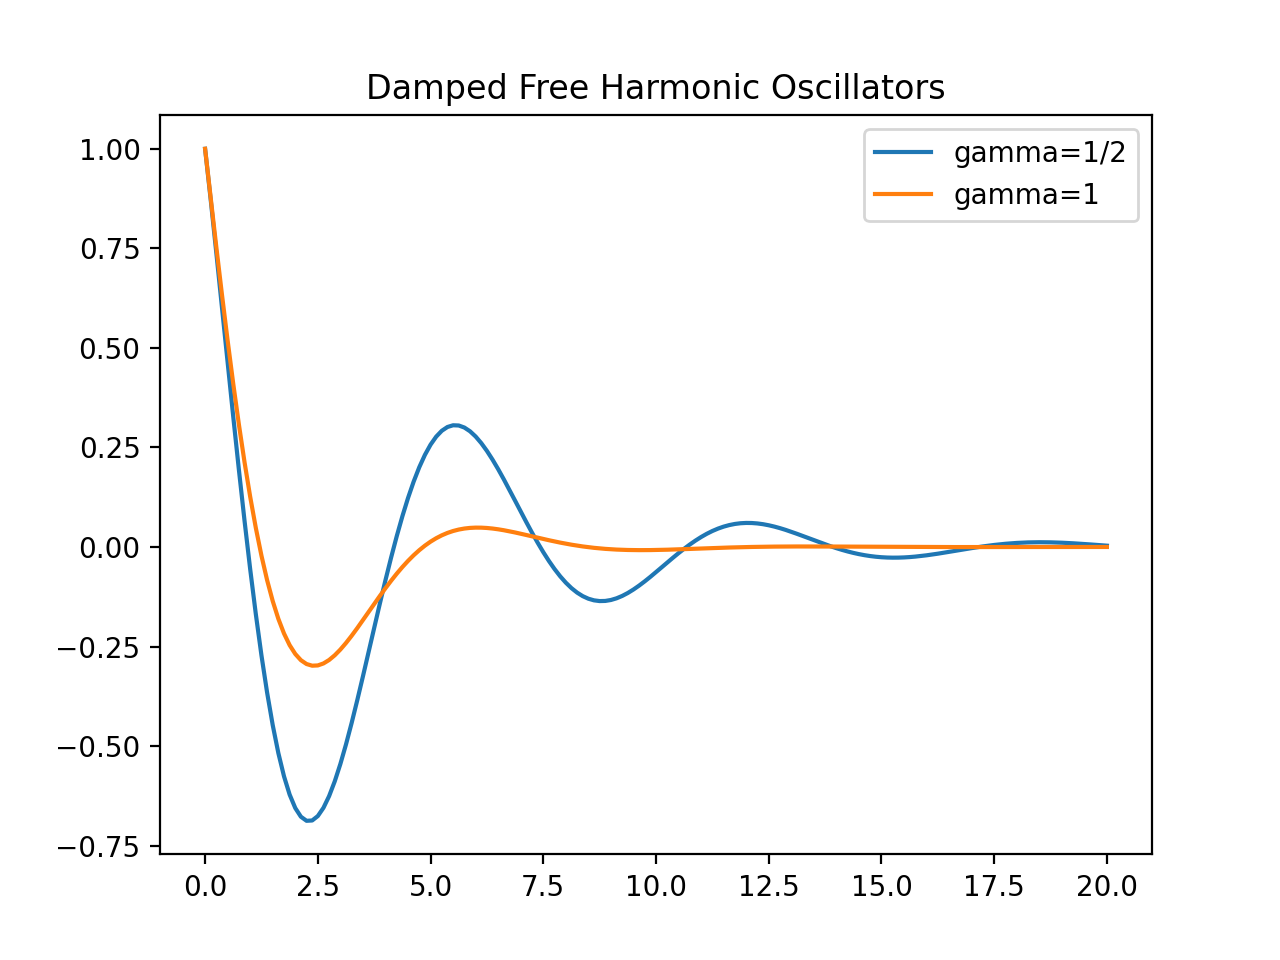

In [9]:
def f_gen(m=1,k=1,gamma=1/2):
    def f(x,t):
        return np.array([x[1], -gamma*x[1]-x[0]])
    return f
#create the intial value list
x0 = np.array([1,-1])
h = 0.0125
t = np.linspace(0,20,int(np.ceil(2/(h)))+1)
x = rk4(f_gen(),x0,t)
x_1 = rk4(f_gen(gamma=1),x0,t)
#plot the results
fig = plt.figure(5)
ax = fig.add_subplot(111)
plt.plot(t,x[:,0],label="gamma=1/2")
plt.plot(t,x_1[:,0],label="gamma=1")
ax.legend(loc="upper right")
ax.set_title("Damped Free Harmonic Oscillators")
plt.show()

## Problem 5

Use the RK4 method to solve for the damped and forced harmonic oscillator satisfying 
\begin{align}
	\begin{split}
&{}2y'' + \gamma y' + 2y = 2 \cos (\omega t), \quad 0 \leq t \leq 40,\\
&{}y(0) = 2, \quad
y'(0) = -1. 
	\end{split}
	\label{ivp:damped_forced_oscillator}
\end{align}
For the following values of $\gamma$ and $\omega,$ plot your numerical approximations of $y(t)$: $(\gamma, \omega) = (0.5, 1.5),$ $(0.1, 1.1),$ and $(0, 1)$.

<IPython.core.display.Javascript object>


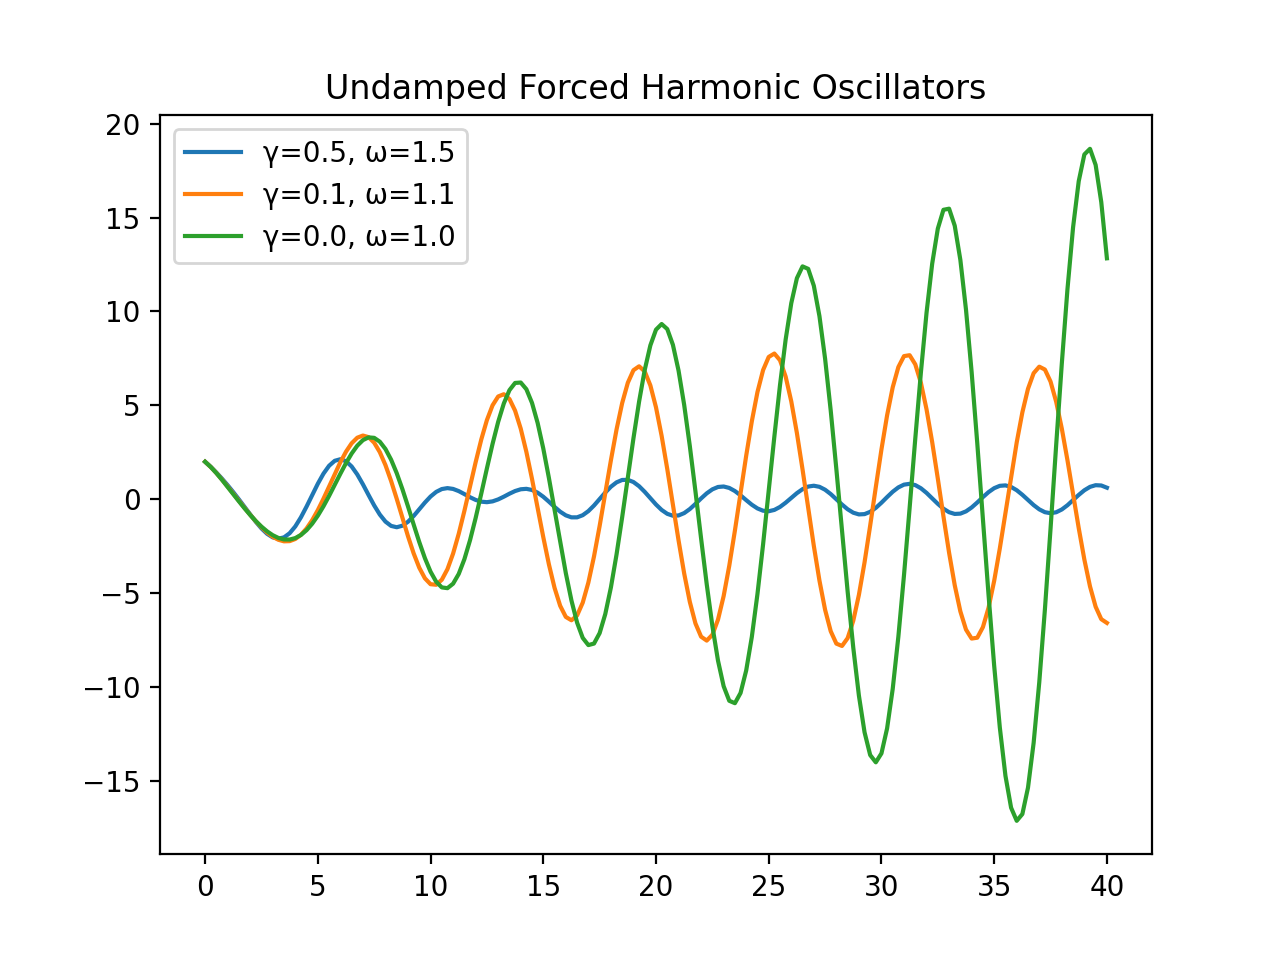

In [10]:
#define the function
def f_gen(gamma=1/2, omega=1.5):
    def f(x,t):
        return np.array([x[1], (-gamma*x[1]-2*x[0]+2*np.cos(omega*t))/2])
    return f
#create the tuple list
tuple_list = [(0.5,1.5),(0.1,1.1),(0.0,1.0)]
x0 = np.array([2,-1])
h = 0.0125
t = np.linspace(0,40,int(np.ceil(2/(h)))+1)
#plot the results
fig = plt.figure(6)
ax = fig.add_subplot(111)
for i in tuple_list:
    gamma,omega = i
    x = rk4(f_gen(gamma=gamma,omega=omega),x0,t)
    plt.plot(t,x[:,0],label="\u03B3={}, \u03C9={}".format(gamma,omega))

ax.legend(loc="upper left")
ax.set_title("Undamped Forced Harmonic Oscillators")
plt.show()